In [133]:
import pandas as pd
import numpy as np
import os
import sympy as sp
import matplotlib.pyplot as plt
import matplotlib.cm as cm
plt.style.use('seaborn-whitegrid')
%matplotlib inline

In [134]:
# Mount Google drive folder
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [135]:
def plotveccomp(x, name = ' ', axis = None, linewidth = 1, color = 'black', marker = ''):
  ax = axis
  component_index = range(0, len(x))
  ax.plot(component_index, x, linewidth = linewidth, color = color, marker = marker) 
  ax.plot(component_index, [np.mean(x)]*len(x), linewidth = 1, linestyle = 'dashed', color ='blue') 
  ax.plot(component_index, [np.mean(x) - np.std(x)]*len(x), linewidth = 1, linestyle = 'dashed', color ='red')
  ax.plot(component_index, [np.mean(x) + np.std(x)]*len(x), linewidth = 1, linestyle = 'dashed', color ='red')
  #ax.set_xlabel('')
  #ax.set_ylabel('')
  ax.set_title(name)

In [136]:
# Simulating a resource matrix
np.random.seed(100)
nsamples = 10
dfResource = pd.DataFrame({'Number of Cores' : np.random.choice(np.arange(2,17), nsamples),
                           'Memory' : np.random.choice([16, 32, 64, 128], nsamples),
                           'Disk Space' : np.random.choice([128, 256, 512, 1024], nsamples),
                           'Network Bandwidth' : np.random.choice(100*np.arange(2, 11), nsamples)})
dfResource['Power Consumption'] = np.random.normal(2, dfResource['Memory'] / (np.max(dfResource['Memory'])-np.min(dfResource['Memory'])), nsamples)

In [137]:
dfResource.shape

(10, 5)

In [138]:
dfResource.head(5)

,Number of Cores,Memory,Disk Space,Network Bandwidth,Power Consumption
0,10,32,1024,600,2.170940
1,10,64,128,300,0.999786
2,5,64,512,700,2.076175
3,9,64,128,500,1.248451
4,9,64,1024,600,1.464288


In [ ]:
R = np.array(dfResource)
(m, n) = R.shape
print(R)

[[1.00000000e+01 3.20000000e+01 1.02400000e+03 6.00000000e+02
  2.17094017e+00]
 [1.00000000e+01 6.40000000e+01 1.28000000e+02 3.00000000e+02
  9.99786370e-01]
 [5.00000000e+00 6.40000000e+01 5.12000000e+02 7.00000000e+02
  2.07617477e+00]
 [9.00000000e+00 6.40000000e+01 1.28000000e+02 5.00000000e+02
  1.24845146e+00]
 [9.00000000e+00 6.40000000e+01 1.02400000e+03 6.00000000e+02
  1.46428834e+00]
 [2.00000000e+00 3.20000000e+01 2.56000000e+02 6.00000000e+02
  2.10977470e+00]
 [1.20000000e+01 1.60000000e+01 2.56000000e+02 5.00000000e+02
  1.90547429e+00]
 [1.60000000e+01 1.60000000e+01 5.12000000e+02 9.00000000e+02
  2.36969371e+00]
 [6.00000000e+00 1.28000000e+02 5.12000000e+02 3.00000000e+02
  7.62169011e-01]
 [4.00000000e+00 1.60000000e+01 1.02400000e+03 3.00000000e+02
  1.70480848e+00]]


In [ ]:
# Returns the j-th standard n-vector
def e(j,n): 
  vec = np.zeros(n)
  vec[j] = 1
  return(vec)

In [ ]:
np.dot(R, e(0, n)) # R * e_1  = 1*r_1 + 0*r_2+....+0*r_n

array([10., 10.,  5.,  9.,  9.,  2., 12., 16.,  6.,  4.])

In [ ]:
np.dot(R.T, e(0, m))

array([  10.        ,   32.        , 1024.        ,  600.        ,
          2.17094017])

In [ ]:
np.dot(R, e(0, n))
np.dot(R.T, e(0, m))

In [142]:
# Load library for ECG data
from scipy.misc import electrocardiogram

In [143]:
x = electrocardiogram()
x = x[0:256]

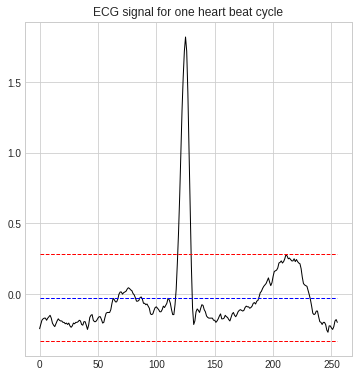

In [144]:
# Plot ECG signal for one heart beat cycle
fig, ax = plt.subplots(1, 1, figsize = (6,6))
fig.tight_layout(pad = 4.0)
plotveccomp(x, 'ECG signal for one heart beat cycle', ax)

In [145]:
N = len(x)

In [147]:
def cbasisvec(k):
  q = np.cos((2*np.pi*k/N)*np.arange(N))
  q = q / np.linalg.norm(q)
  return(q)

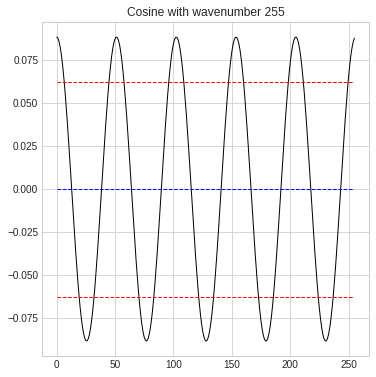

In [148]:
## Plot of a representative Cosine basis vector
q = cbasisvec(5)
fig, ax1 = plt.subplots(1, 1, figsize = (6,6))
fig.tight_layout(pad = 4.0)
plotveccomp(q, 'Cosine with wavenumber '+str(k), ax1)

In [149]:
# Cosine basis vectors stored in rows of matrix Q
Q = np.zeros((N, N))
for k in np.arange(N):
  Q[k, :] = cbasisvec(k)

In [152]:
np.dot(Q[1, :], Q[1, :])

1.0

In [ ]:
# Shadow lengths
s = np.dot(Q, x)
s

In [ ]:
z = np.array([-6, 8, -2, 1, -5, 10]) 
print(np.argsort(-np.abs(z))) # Index of elements sorted in descening order of absolute value

[5 1 0 4 2 3]


In [155]:
nbasis = N
topindices = np.argsort(-np.abs(s))[0:nbasis]
#print(topindices)
#print(s[topindices])
x_reconstructed = np.zeros(N)
for j in np.arange(len(topindices)):
  x_reconstructed = x_reconstructed + s[topindices[j]] * Q[topindices[j], :]
#print(x_reconstructed.shape)  

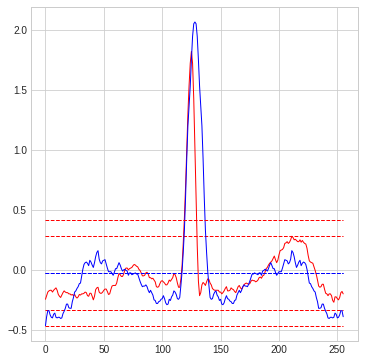

In [157]:
fig, ax = plt.subplots(1, 1, figsize = (6,6))
fig.tight_layout(pad = 4.0)
plotveccomp(x, '', ax, 1, 'red', '')
plotveccomp(x_reconstructed, '', ax, 1, 'blue')

In [ ]:
# Difference matrix
N = len(x)
D = np.zeros((N-1, N))
for i in np.arange(N-1):
  D[i, i] = -1
  D[i, i+1] = 1         
#print(D)

In [ ]:
x_noisy = x + np.random.normal(0, 0.1, N)
fig, ax = plt.subplots(1, 1, figsize = (6,6))
fig.tight_layout(pad = 4.0)
plotveccomp(x, '', ax, 1, 'red', '')
plotveccomp(x_noisy, '', ax, 1, 'blue', '')

In [ ]:
# How noise is our ECG signal?
noise = np.linalg.norm(np.dot(D, x))
print(noise)
noise = np.linalg.norm(np.dot(D, x_noisy))
print(noise)

1.1145739096174823
2.4629917565244117


In [ ]:
N = len(x)
# Convolution filter
b = (1/4)*np.ones(4) 
# Convolution
T = np.zeros((N+len(b)-1, N))
# Build the convolution matrix T
for j in np.arange(N):
  T[j:len(b)+j, j] = b
x_smooth = np.dot(T, x_noisy)

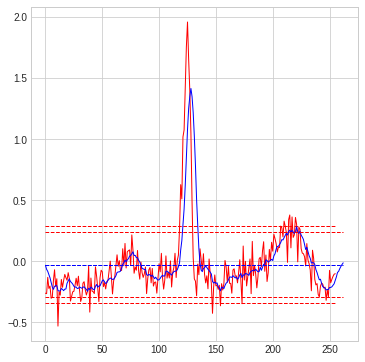

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (6,6))
fig.tight_layout(pad = 4.0)
plotveccomp(x_noisy, '', ax, 1, 'red', '')
plotveccomp(x_smooth, '', ax, 1, 'blue', '')

In [ ]:
# Setup working directory and load data
DIR = '/content/drive/My Drive/Colab Notebooks/OddSem2020MAHE'
FILENAME = 'Data/ecg_missing.txt'
os.chdir(DIR)
# Load ECG data with missing values
df = pd.read_csv(FILENAME, header = None, names = ['ecgvalues'])
df['ecgvalues'] = df['ecgvalues'].astype(float)

In [ ]:
df.head(5)

,ecgvalues
0,-0.014374
1,NaN
2,-0.012637
3,NaN
4,-0.010812


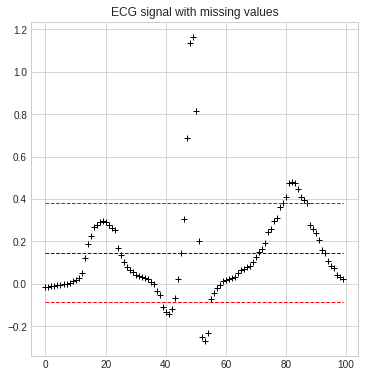

In [ ]:
# Plot ECG signal for one heart beat cycle
fig, ax = plt.subplots(1, 1, figsize = (6,6))
fig.tight_layout(pad = 4.0)
plotveccomp(df['ecgvalues'].dropna(), 'ECG signal with missing values', ax, 0, 'black', '+')